# Lab2

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

### 例题1

In [235]:
df = pd.read_csv('data/R_alr4_Heights.csv')

In [236]:
X=df['mheight']
y=df['dheight']
X=sm.add_constant(X)

In [237]:
model = sm.OLS(y, X).fit()
# 回归系数
coefficients = model.params

In [238]:
# 汇总
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                dheight   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.22e-84
Time:                        22:33:18   Log-Likelihood:                -3075.0
No. Observations:                1375   AIC:                             6154.
Df Residuals:                    1373   BIC:                             6164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9174      1.622     18.439      0.0

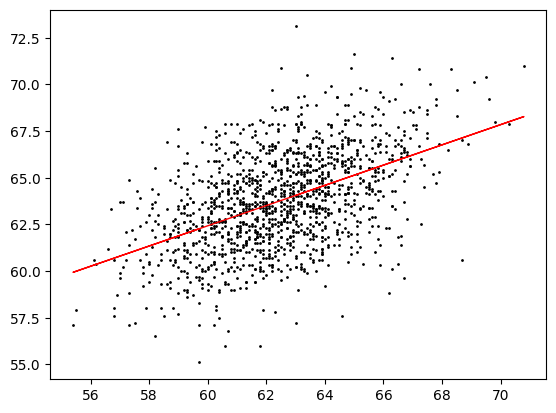

In [239]:
plt.scatter(df['mheight'],df['dheight'],marker='o',s=1,color='black')
#把预测的直线画出来
plt.plot(df['mheight'],model.predict(X),color='red',linewidth=1)
plt.show()

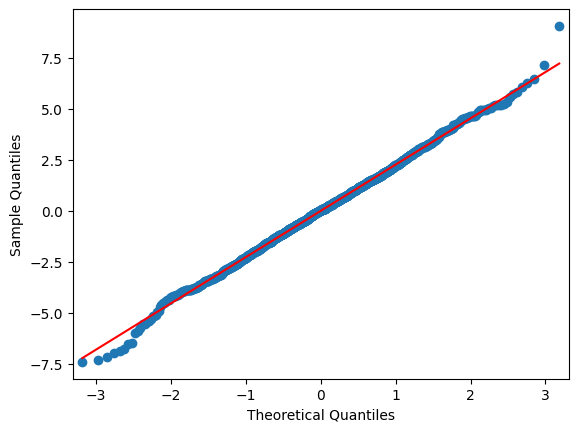

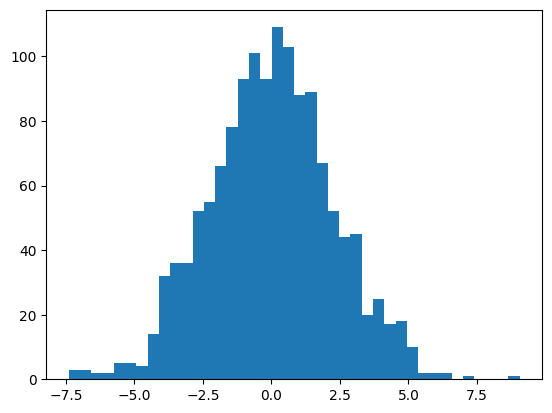

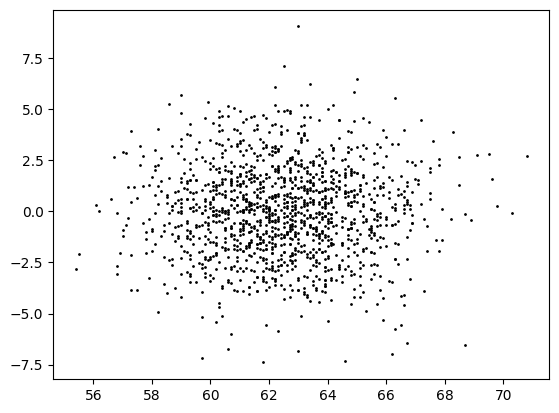

In [240]:
#残差分析
residual=model.resid
#残差是否正态
sm.qqplot(residual,line='s')
plt.show()
plt.hist(residual,bins=40)
plt.show()
#残差与自变量 mheight 是否存在某种非线性关系？
plt.scatter(df['mheight'],residual,marker='o',s=1,color='black')
plt.show()

### 例题2

In [241]:
df=pd.read_csv('data/R_alr4_brains.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df_eg2=df.copy()

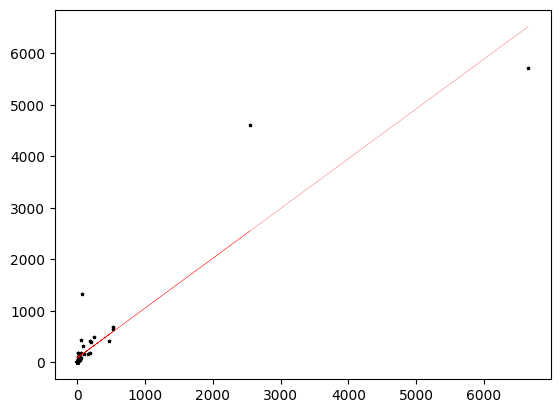

const     91.008644
BodyWt     0.966460
dtype: float64


In [242]:
# 画出散点图
plt.scatter(df['BodyWt'],df['BrainWt'],marker='*',s=4,color='black')
#拟合简单线性模型
X=df['BodyWt']
y=df['BrainWt']
X=sm.add_constant(X)
model_eg2=sm.OLS(y,X).fit()
plt.plot(df['BodyWt'],model_eg2.predict(X),linewidth=0.1,color='red')
plt.show()
Brain_pred=model_eg2.predict(sm.add_constant(df['BodyWt']))
print(model_eg2.params)

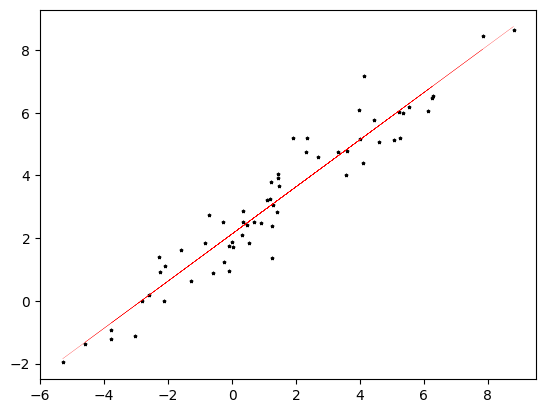

In [243]:
#对两个变量取对数
df_log=np.log(df)
# 画出散点图
plt.scatter(df_log['BodyWt'],df_log['BrainWt'],marker='*',s=4,color='black')
#拟合简单线性模型
X=df_log['BodyWt']
y=df_log['BrainWt']
X=sm.add_constant(X)
model_eg2_log=sm.OLS(y,X).fit()
plt.plot(df_log['BodyWt'],model_eg2_log.predict(X),linewidth=0.1,color='red')
plt.show()

In [244]:
BrainWt_logpred=model_eg2_log.predict(sm.add_constant(df_log['BodyWt']))
#pd.DataFrame({'BrainWt':df['BrainWt'],'BrainWt_logpred':np.exp(BrainWt_logpred),'BrainWt_pred':Brain_pred}).head()

# 练习一
福布斯 2019 财富榜前 100 名数据：
http://staff.ustc.edu.cn/~ynyang/2023/lab/forbes2019.txt
第 1 列是排名 (Rank)，第 4 列为财富值 (Wealth), 试研究财富与排名的关系。

In [245]:
#以'\t'为分隔符读取数据
data=pd.read_table('data/forbes2019.txt')

In [246]:
df=pd.DataFrame({'Rank':data.iloc[:,0],'Wealth':data.iloc[:,3]})

In [247]:
X=df['Wealth']
y=df['Rank']
X=sm.add_constant(X)

In [248]:
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.16e-22
Time:                        22:33:20   Log-Likelihood:                -428.11
No. Observations:                 100   AIC:                             860.2
Df Residuals:                      98   BIC:                             865.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9459      3.046     26.906      0.0

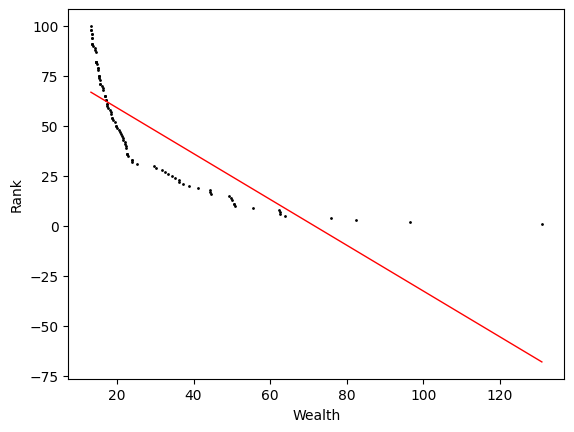

In [249]:
plt.scatter(df['Wealth'],df['Rank'],marker='o',s=1,color='black')
plt.plot(df['Wealth'],model.predict(X),color='red',linewidth=1)
plt.xlabel('Wealth')
plt.ylabel('Rank')
plt.show()

### 取对数之后再拟合

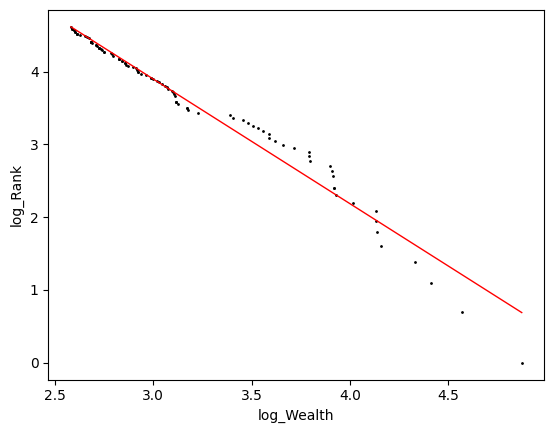

const     9.026446
Wealth   -1.710065
dtype: float64


In [250]:
#取log之后再拟合
df_log=np.log(df)
X=df_log['Wealth']
y=df_log['Rank']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
plt.scatter(df_log['Wealth'],df_log['Rank'],marker='o',s=1,color='black')
plt.plot(df_log['Wealth'],model.predict(X),color='red',linewidth=1)
plt.xlabel('log_Wealth')
plt.ylabel('log_Rank')
plt.show()
print(model.params)

答：
发现取对数之后的模型更好
所建立的模型为：log(Rank)=(9.026446)+log(Wealth)*(-1.710065)

# 练习二
类似于例 1 中的残差分析，考察例 2 两个模型的拟合效果。

In [251]:
def residual_analysis(df,model,x_name):
    residual=model.resid
    #残差是否正态
    sm.qqplot(residual,line='s')
    plt.show()
    plt.hist(residual,bins=30)
    plt.show()
    #残差与自变量是否存在某种非线性关系？
    plt.scatter(df[x_name],residual,marker='o',s=1,color='black')
    plt.show()

例题2线性模型的残差分析

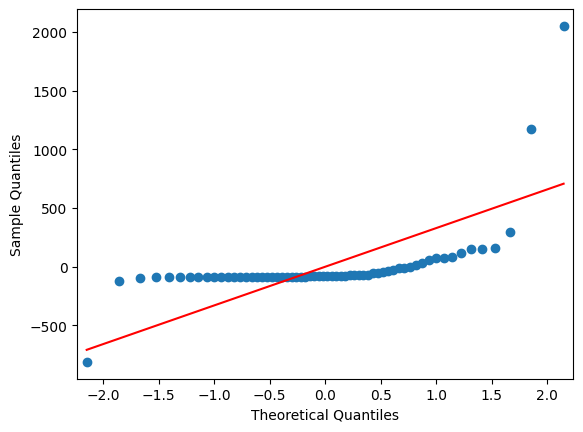

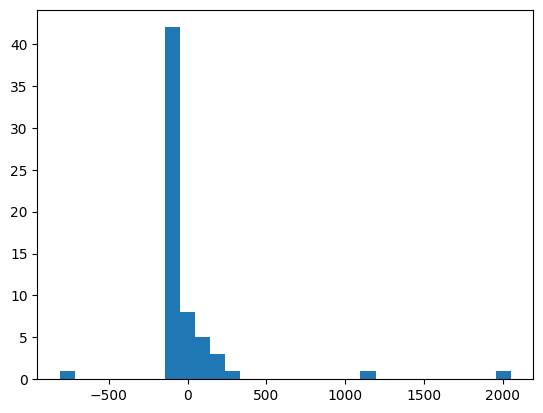

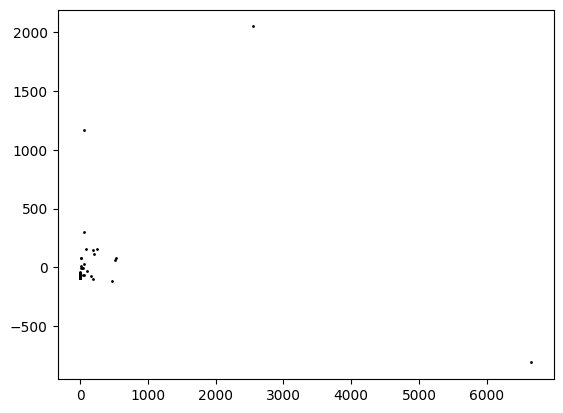

In [252]:
residual_analysis(df_eg2,model_eg2,'BodyWt')

例题2对数线性模型的残差分析

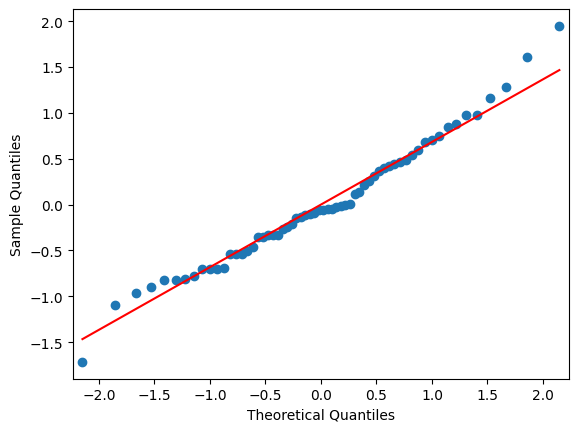

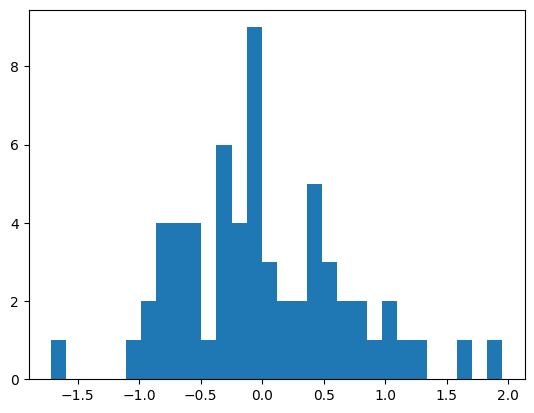

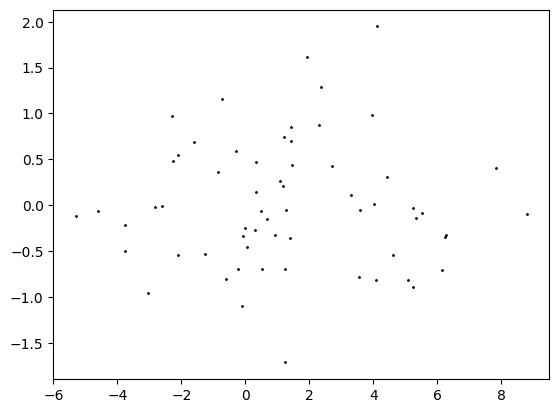

In [253]:
residual_analysis(np.log(df_eg2),model_eg2_log,'BodyWt')

# 练习三

In [254]:
df=pd.read_table('data/height-weight.txt')

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     314.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.11e-42
Time:                        22:33:23   Log-Likelihood:                 137.87
No. Observations:                 199   AIC:                            -271.7
Df Residuals:                     197   BIC:                            -265.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5988      0.088     29.387      0.0

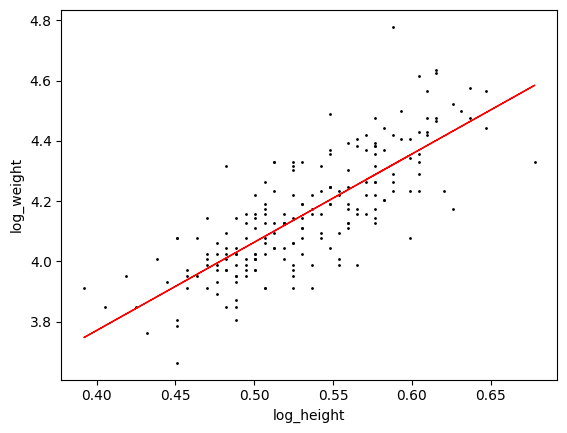

In [255]:
X=np.log(df['height'])
y=np.log(df['weight'])
X=sm.add_constant(X)
model_log=sm.OLS(y,X).fit()
print(model_log.summary())
print(model_log.params)
plt.scatter(np.log(df['height']),np.log(df['weight']),marker='o',s=1,color='black')
plt.plot(np.log(df['height']),model_log.predict(X),color='red',linewidth=1)
plt.xlabel('log_height')
plt.ylabel('log_weight')
plt.show()

### (a) 
应用前述模型，使用所有数据 (不考虑性别) 求出 a,b,σ 的 LS 估计, 计算你自己的体重指数 ξ，判
断自己体重是否超标，并计算群体中超过你的体重指数 ξ 值的人的比例。


In [256]:
def cal_bmi(height,weight,model):
    return (np.log(weight)-model.params[0]-model.params[1]*np.log(height))/(((model.resid**2).sum()/model.df_resid)**0.5)
my_bmi=cal_bmi(1.724,65.5,model_log)
print(f'我的epsilon指数是{my_bmi}')

我的epsilon指数是-0.10158930069421292


In [257]:
list=pd.DataFrame(cal_bmi(df['height'],df['weight'],model_log))
print(f'列表中比我的epsilon指数高的比例约为{list[list>my_bmi].dropna().shape[0]/list.shape[0]}')

列表中比我的epsilon指数高的比例约为0.5477386934673367


### (b)
 检验 H0 : b = 2 ;检验统计量t=$\sqrt {s_{xx}}(\hat{b} − 2)/\hat{\sigma}$;$t$ ~ $t_{n-2} $. 如果不显著，则可认为 b = 2, 从而你得到了 BMI 计算公式！)。
 remark:.std()的公式为S=sqrt(np.sum((x-x.mean())**2)/(n-1))

In [258]:
t=np.sqrt(((df['height']-df['height'].mean())**2).sum())*(model_log.params[1]-2)/model_log.resid.std()
print(f'检验统计量为{t}')

检验统计量为9.648346102081407


In [259]:
#求t_n-2的0.05分位数
print(f't_{df.shape[0]-2}的0.025上分位数为{scipy.stats.t.ppf(0.975,df.shape[0]-2)}')
print('于是拒绝原假设，认为b不等于2')

t_197的0.025上分位数为1.9720790337760217
于是拒绝原假设，认为b不等于2


### (c)
我们可以不取对数，直接建立线性模型 W = a + bH + $\epsilon$ ,$\epsilon$~$N(0,\sigma^2$)

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.01e-40
Time:                        22:33:24   Log-Likelihood:                -707.79
No. Observations:                 199   AIC:                             1420.
Df Residuals:                     197   BIC:                             1426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -130.7470     11.563    -11.308      0.0

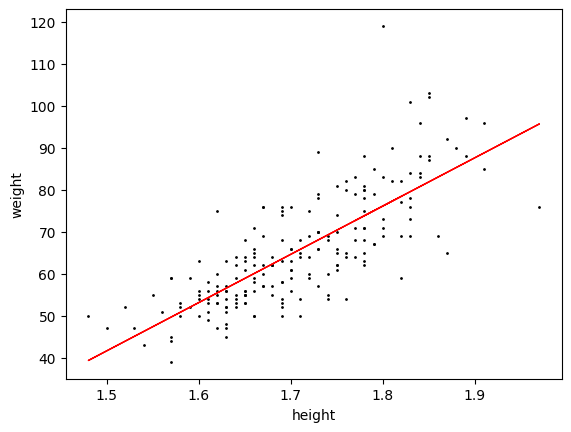

In [260]:
X=df['height']
y=df['weight']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())
print(model.params)
plt.scatter(df['height'],df['weight'],marker='o',s=1,color='black')
plt.plot(df['height'],model.predict(X),color='red',linewidth=1)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [261]:
def cal_bmi_linear(height, weight, model):
    return (weight - model.params[0] - model.params[1] * height) / (((model.resid ** 2).sum() / model.df_resid) ** 0.5)
my_bmi = cal_bmi_linear(1.724, 65.5, model)
print(f'我的epsilon指数是{my_bmi}')
list = pd.DataFrame(cal_bmi_linear(df['height'], df['weight'], model))
print(f'列表中比我的epsilon指数高的比例约为{list[list > my_bmi].dropna().shape[0] / list.shape[0]}')
print('与a中得到的结果差不多')

我的epsilon指数是-0.22044291167298843
列表中比我的epsilon指数高的比例约为0.5628140703517588
与a中得到的结果差不多


### (d)
方法 (a) 和 (c) 哪个更合理？这依赖于哪个模型能更好地拟合数据。模仿例 1 的残差分析，考察两
个模型的拟合效果

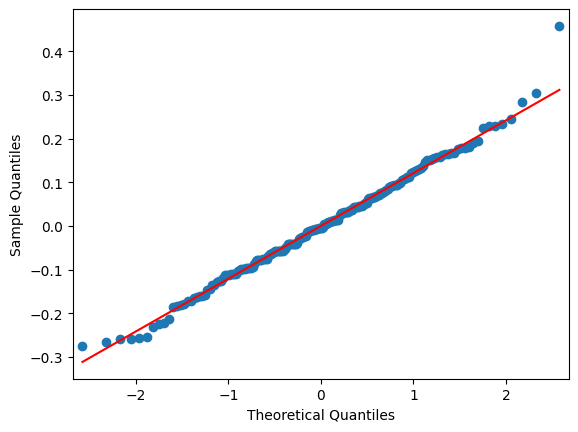

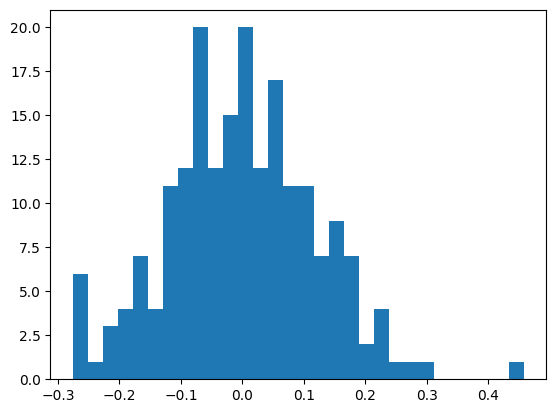

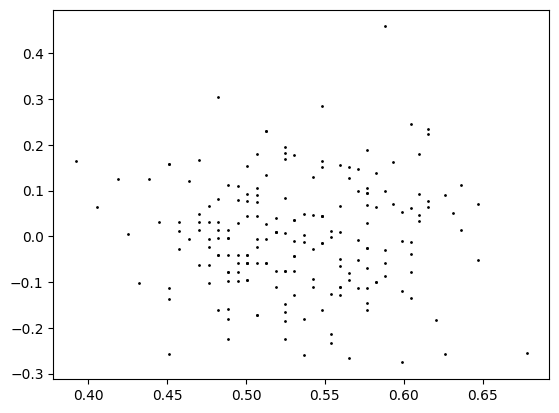

In [262]:
#残差分析
residual_analysis(np.log(df+1e-5),model_log,'height')

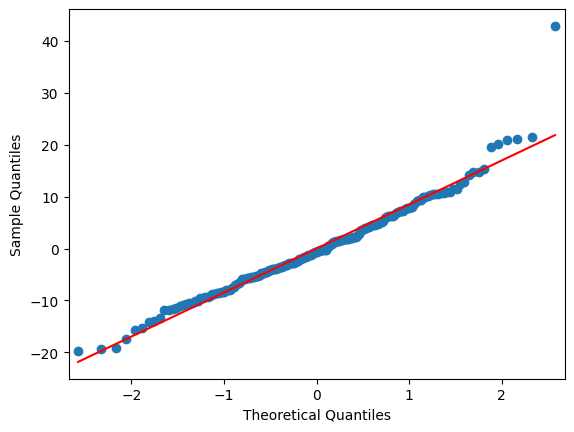

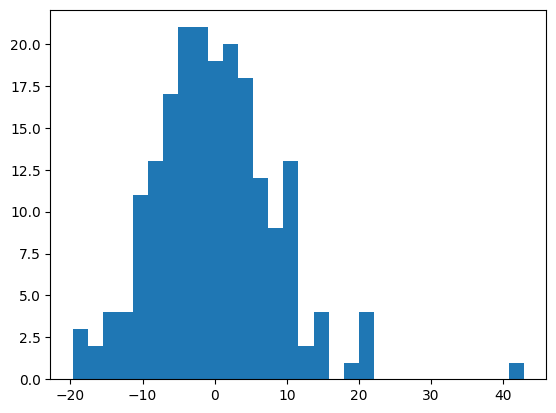

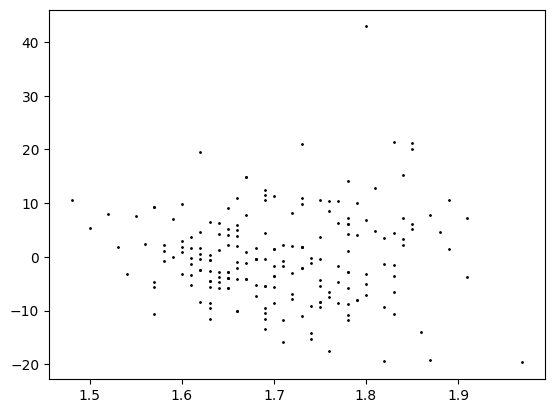

In [263]:
residual_analysis(df,model,'height')

答：从二者表现来看，二者效果都很不错，但从qq图来看取对数之后的模型稍微好

# (e)
显然性别与 W，H 都有关，因此我们应该在对数尺度简单模型中添加一项控制性别：log(W) =
a +b ×log(H)) +c ×Sex +ϵ, 相应地, R 命令为 lm(logW ∼ logH +Sex)。此时，你能否推断出 b = 2?

In [264]:
X=pd.DataFrame([np.log(df['height']),df['sex']]).T
y=np.log(df['weight'])
X=sm.add_constant(X)
model_log=sm.OLS(y,X).fit()
print(model_log.params)

const     3.008705
height    2.057156
sex       0.124078
dtype: float64


In [265]:
#检验b=2
t=np.sqrt(((np.log(df['height'])-np.log(df['height']).mean())**2).sum())*(model_log.params[1]-2)/(((model_log.resid**2).sum()/model_log.df_resid)**0.5)
print(f'检验统计量为{t}')
#求t_n-3的0.05分位数
print(f't_{df.shape[0]-2}的0.025上分位数为{scipy.stats.t.ppf(0.975,df.shape[0]-2)}')
print('于是接受原假设，认为b等于2')

检验统计量为0.3673653017397748
t_197的0.025上分位数为1.9720790337760217
于是接受原假设，认为b等于2


# 练习四
有人声称如下论断：如果一个正随机变量 x 服从对数正态分布, 即 log(x) ∼ N(0,1), 则 x 的首位非 0 数字 d 服从 Benford 定律, 即
P(d = i) = log10(1 + 1/i),i = 1,2,...,9.
试通过模拟实验验证上述论断是否成立。


In [266]:
N=1000
np.random.seed(0)
X=np.random.normal(0,1,N)
X=np.exp(X)


for i in range(len(X)):
    while X[i]<1:
        X[i]=X[i]*10

#取首位非零的数字
X=X.astype(str)
X=pd.DataFrame(X)
X['first']=X.iloc[:,0].str[0]
X['first']=X['first'].astype(int)

In [267]:
numerical_prob=X['first'].value_counts()
#benford定律
benford=pd.DataFrame([np.log10(1+1/i) for i in range(1,10)],index=range(1,10),columns=['benford'])*N
data=pd.DataFrame({'numerical_prob':numerical_prob,'benford':benford['benford']})

In [268]:
#卡方检验
chi2=np.sum((numerical_prob-benford['benford'])**2/benford['benford'])
print(f'卡方检验统计量为{chi2}')
print(f'自由度为8的卡方分布的0.95分位数为{scipy.stats.chi2.ppf(0.95,8)}')

卡方检验统计量为10.49169161383419
自由度为8的卡方分布的0.95分位数为15.507313055865453


In [269]:
#运用库库函数进行卡方检验
scipy.stats.chisquare(numerical_prob,benford['benford'])

Power_divergenceResult(statistic=6.302702612358972, pvalue=0.6133649185494727)

答：在样本量是1000的条件下进行卡方检验，得到的卡方检验统计量为10.5，小于自由度为8的卡方分布的0.95分位数为15.51，p值为0.6；因此接受原假设，认为benford定律成立。
当然我试过样本量是10000的时候，那时候卡方检验是拒绝的，这个说实话我不太明白。